## Python tools for literature review: Extracting figures with the custom package zbinfigs
Isaac Spackman, Shubham Vyas  
### Abstract  
Scientific literature review is an essential task for every field, but efforts to support automated data analysis are challenged by a high barrier to entry for non-software science fields. With the advent of new large language machine learning models, bibliometric analysis of semantic text is becoming more common, though it remains inaccessible to most general scientists. Common web-based connection tools such as Connected Papers, Litmaps, Research Rabbit and others serve to bridge this gap for semantic feature based connections in a more accessible way, but there is limited support for the image-based connections that more closely reflect human-based literature review practices (i.e. skimming figures). In addition, these tools are often limited to selecting a single seed paper or small selection of keywords, and these library science tools may not include the full suite of journals an individual may have access to. Research Rabbit stands out as an alternative solution that allows users to integrate a reference manager (Zotero) directly into their literature review pipeline, however Research Rabbit also does not support image-based connections. To support efforts to train AI models on published figures and enable these connections, we present a new python package Zbinfigs. Zbinfigs allows users to integrate their reference library through an exported Zotero collection with a pre-trained figure extracting model from the marker-pdf package, enabling users to more easily extract figures to a common location. Once the figures are extracted, Zbinfigs includes support to label and sort images into folders which may later be used to train AI models specific to particular fields. By starting with a defined set of papers specific to a particular subfield or model, Zbinfigs enables more precise data labeling practices, reducing the number of pages for researchers to sort through by nearly 80%.  
  
**Keywords:** *feature extraction, zotero integration, literature review, bibliometric analysis, python packaging*  

### Introduction  
Zotero is a free and open-source tool that helps researchers collect, organize, cite, and share their research. It acts as a reference management system, allowing users to store and manage bibliographic references, add notes and attachments, and create bibliographies. Folders containing references can be exported from the program as a *zotero collection* containing citation imformation and notes in the format of a .csv file. When users add references to a collection, Zotero attempts to store a copy of the original work in the form of a .pdf or .html file. The paths to these files are recorded in the exported .csv file.  
  
When performing a systematic literature review, it is common to generate a large amount of cited material in a single collection matching some systematic search terms or phrases. Researches may then open each reference one by one, skimming the paper for relevance and importance to the larger review. During this process, figures are often used as a quick entry point to sort material (a picture is worth a thousand words), however these images constitute a minority of the pages in a typical research article. In large systematic literature reviews, hundreds of articles may need to be sorted, and in these cases scrolling over pages of dense research to find figures can be cumbersome and time consuming. To reduce the time spent scrolling over pages of text to find the few essential figures, we present the `zbinfigs` python package. The code is designed to support quickly evaluating papers based on a single summary .pdf file containing all of the figures from a zotero collection. From this single .pdf researchers can label figures to be sorted into arbitrary categories, offering a simple way of tagging data for later review, or preparing train/test sets for machine learning image analysis. This notebook serves to introduce the package, demonstrate its use and welcome collaboration to improve documentation and extend built-in machine learnign capabilities.  

### Overview  
zbinfigs is a python code designed to facilitate classification of scholarly articles stored in zotero collections.  
The code input is a .csv exported from a zotero collection. The code allows for several options:  
  1. Organize and compile .pdfs
  2. Extract images to summary .pdf
  3. Read annotations
  4. Train and test classifier (future implementation)

### Organize and Compile
A raw zotero collection may not have .pdf files for all records, and for those that have .pdf files not all may be accessible. 
In the organize and compile option, the program reads a default .csv describing a zotero collection and checks all of the file links.
Where no files are available, this flag is written to a summary document. If only .html files are available, the program strips the CSS 
from the file and converts it to a .pdf file. At the end of the program execution, all available .pdf files are written to a common folder. 
This can be useful to transfer data to a HPC system for further analysis.  

### Extract Images 
From a folder of .pdf files and the original exported zotero .csv file, the program uses the **marker** package to convert to markdown and 
extract the figure images. The figure images for the entire directory are stitched into a single .pdf file for review and annotation. 
The converted text and original image files are retained for further semantic analysis. This step may be broken into chunks for parallel processing 
on a HPC system.

### Read Annotations 
The program takes an annotations input file that contains the .pdf page number for all figures that match from manual annotation. 
These annotations are then connected with the original zotero collection .csv file and summary statistics written.  

### Train and Test Classifier  
From the annotated dataset, several classifiers are applied and summary performance written. *Note: This functionality is not yet implemented - we welcome collaboration!*  
  

### Documentation

The documentation for this project is hosted on [Read the Docs](https://zbinfigs.readthedocs.io/en/latest/). You can find the latest version of the documentation there, including installation instructions, usage guides, and other important information. *Note: The documentation is currently being updated and may not work as expected. We welcome collaboration from users that may have more experience implementing automated documentation via sphinx.*



## Tutorial : Using zbinfigs to analyze a zotero collection  

### Install
To begin, install the `zbinfigs` python package either from this github repository via  

```shell
pip install -e ../.
```
  
or via pypi  
  
```shell  
pip install zbinfigs  
```

### Read a Collection

Begin by reading in a .csv file containing a zotero collection:

In [1]:
import zbinfigs as zbf
import os

os.chdir("examples") # Change to working directory

path = r"mycollection.csv" # A short sample collection is included in the examples folder

# Read the collection into a zbf.collection object
collection = zbf.read_collection(path)


The `zbf.collection` object contains a pandas dataframe with the data from the zotero collection.  
We can print the head of this dataframe to inspect the contents like so:

In [2]:
print(collection)

        Key       Item Type  Publication Year  \
0  8A3JWPSS     bookSection              1978   
1  FCAXR8L3  journalArticle              2021   
2  RU3WXEZP  journalArticle              2022   
3  Z7Z8UGAW  journalArticle              1977   
4  88NPEABZ  journalArticle              2009   

                                              Author  \
0                                  Leslie Dutton, P.   
1  Nutting, Jordan E.; Gerken, James B.; Stamouli...   
2  Kurwadkar, Sudarshan; Dane, Jason; Kanel, Sush...   
3      Holland, G. N; Bottomley, P. A; Hinshaw, W. S   
4  Belle, Catherine; Béguin, Claude; Hamman, Sylv...   

                                               Title  \
0  [23] Redox potentiometry: Determination of mid...   
1  “How Should I Think about Voltage? What Is Ove...   
2  <i>Per</i>- and polyfluoroalkyl substances in ...   
3                     19F magnetic resonance imaging   
4  19F NMR: An underused efficient probe for para...   

                      Publicati

### Export PDFS to Common Folder  
Once the `zbf.collection` object has been created, we can easily extract the .pdf files for each record to a common folder:

In [3]:
collection.export_pdfs_to_folder(folder="mypdfs")

2025-05-23 11:20:43,309 - WARNING - The .pdf file does not exist for [23] Redox potentiometry: Determination of midpoint potentials of oxidation-reduction components of biological electron-transfer systems: /home/ispackman/scratch/zbinfigs/examples/.\Zotero\storage\B5QRBI2N\Leslie Dutton - 1978 - [23] Redox potentiometry Determination of midpoin.pdf
2025-05-23 11:20:43,310 - WARNING - The HTML file does not exist for [23] Redox potentiometry: Determination of midpoint potentials of oxidation-reduction components of biological electron-transfer systems: /home/ispackman/scratch/zbinfigs/examples/C:\Users\isaac\Zotero\storage\CR56IDRB\S0076687978540263.html
2025-05-23 11:20:43,311 - WARNING - No valid file found for [23] Redox potentiometry: Determination of midpoint potentials of oxidation-reduction components of biological electron-transfer systems.
2025-05-23 11:20:43,311 - WARNING - No files found for record 8A3JWPSS
2025-05-23 11:20:43,312 - INFO - The .pdf file exists for “How Shoul

Some records may not have .pdf files available. For these records, users may want to locate a .pdf file and independently upload to their zotero collection before re-exporting the collection as a .csv file. Other records may contain the original work in the format of a .csv file. These records are internally converted by `zbinfigz` to a .pdf format. Error messages and warnings can be controlled with the `logging` package.  
  
The result of exporting the pdfs to a folder is a directory structure like so:
  
mypdfs/  
├── 88NPEABZ_HTML.pdf  
├── 943ET5GN.pdf  
├── FCAXR8L3.pdf  
├── RE9DHFW6.pdf  
├── RU3WXEZP.pdf  
└── Z7Z8UGAW_HTML.pdf  
  
The name of each .pdf file will be taken from the zotero identifier. Occasionally there are issues when converting from .html to .pdf formats, so these files are labeled if further analysis is required.  


### Process PDFS Folder
Once the .pdf files are all located in a common directory, we can extract the figures and text with a simple command:  

In [4]:
zbf.process_pdf_folder(pdfs_folder="mypdfs", file_range=(0, 5))

Loaded layout model datalab-to/surya_layout on device cuda with dtype torch.float16


Using a slow image processor as `use_fast` is unset and a slow processor was saved with this model. `use_fast=True` will be the default behavior in v4.48, even if the model was saved with a slow processor. This will result in minor differences in outputs. You'll still be able to use a slow processor with `use_fast=False`.


Loaded texify model to cuda with torch.float16 dtype
Loaded recognition model vikp/surya_rec2 on device cuda with dtype torch.float16
Loaded table recognition model vikp/surya_tablerec on device cuda with dtype torch.float16
Loaded detection model vikp/surya_det3 on device cuda with dtype torch.float16


100%|██████████| 4/4 [00:00<00:00, 27.78it/s]
Detecting bboxes: 0it [00:00, ?it/s]
Recognizing equations: 0it [00:00, ?it/s]
Recognizing tables: 100%|██████████| 1/1 [00:00<00:00,  1.59it/s]
2025-05-23 11:21:18,977 - INFO - Successfully processed and saved files for 88NPEABZ_HTML.pdf.
100%|██████████| 1/1 [00:00<00:00, 31.29it/s]
Detecting bboxes: 0it [00:00, ?it/s]
Recognizing equations: 100%|██████████| 1/1 [00:02<00:00,  2.76s/it]
Recognizing tables: 0it [00:00, ?it/s]
2025-05-23 11:21:25,631 - INFO - Successfully processed and saved files for 943ET5GN.pdf.
100%|██████████| 2/2 [00:00<00:00, 34.50it/s]
Detecting bboxes: 0it [00:00, ?it/s]
Recognizing equations: 100%|██████████| 1/1 [00:03<00:00,  3.53s/it]
Recognizing tables: 0it [00:00, ?it/s]
2025-05-23 11:21:35,886 - INFO - Successfully processed and saved files for FCAXR8L3.pdf.
100%|██████████| 2/2 [00:00<00:00, 28.70it/s]
Detecting bboxes: 0it [00:00, ?it/s]
Recognizing equations: 100%|██████████| 1/1 [00:01<00:00,  1.73s/it]


Note that file processing and figure extraction may take a few seconds per file. For this reason, there is a built-in filtering option to select a range of files to process. In the example above, we process all the files in a single calculation. When processing hundreds of files, it may be useful to batch different files in an embarrasingly parallel approach.  
  
In addition, it may be advisable to check file sizes before running this command. Large files - such as textbooks - may run into memory issues.  
  
The result of this operation will be a new folder for each file that was processed. The folder names will be the zotero identifier, and the contents will include the original .pdf, a markdown file of the extracted text and a series of .jpeg image files containing the extracted figures.  

### Gathering Figures to a Common Location
While the file structure and markdown text are now much more machine readable than the original .pdf files, they are still hidden away in a folder structure.  
To collect all of the figures to a common .pdf file, we can use the `zbf.gather_figures()` function:

In [5]:
# locate the image files for the .pdfs in the range selected and merge into a single .pdf
# export the page ranges for each record to a .csv
zbf.gather_figures(pdfs_folder="mypdfs", file_range=(0, 2))
zbf.gather_figures(pdfs_folder="mypdfs", file_range=(3, 5))

2025-05-23 11:22:04,813 - INFO - Processing folders: ['mypdfs/88NPEABZ', 'mypdfs/943ET5GN', 'mypdfs/FCAXR8L3']
Gathering PDF images: 100%|██████████| 3/3 [00:00<00:00, 9815.06folder/s]
2025-05-23 11:22:05,279 - INFO - Successfully gathered figures into a single PDF and exported page ranges.
2025-05-23 11:22:05,280 - INFO - Processing folders: ['mypdfs/RE9DHFW6', 'mypdfs/RU3WXEZP', 'mypdfs/Z7Z8UGAW']
Gathering PDF images: 100%|██████████| 3/3 [00:00<00:00, 7767.23folder/s]
2025-05-23 11:22:05,554 - INFO - Successfully gathered figures into a single PDF and exported page ranges.


This function shows the use of the `file_range` selector, gathering figures from selected file ranges into single .pdf files. In the same action, the new .pdf page numbers are recorded to a .csv file for later mapping.  
  
The resulting merged .pdf files containing only figures can be combined into a single summary .pdf containing all of the figures from the entire collection like so:  

In [6]:
zbf.merge_summary_pdfs(pdfs_folder="mypdfs")

Merging CSVs: 100%|██████████| 2/2 [00:00<00:00, 397.85file/s]

Merged PDF saved as: mypdfs/figure_summary.pdf
Updated CSV saved as: mypdfs/figure_summary.csv


This final document kept track of which pages/figures correspond to which citations (see figure_summary.csv). This allows users to quickly identify the original source of a figure based soley on the page number in the figure_summary.pdf file.

### Adding Annotations
Once the final figure_summary.pdf document is written, it can be useful to label figures based on meaningful categories.   
  
A simple table can be written as a .csv to accomplish this.  
The headers are categories and the entries are the page numbers in the figure_summary.pdf file corresponding to the figure:  
| people | logos | misc |
|--------|-------|------|
| 2      | 1     | 54   |
| 5      | 6     | 34   |
| 8      | 11    | 38   |
| 10     | 21    | 42   |
| 15     | 31    | 43   |
  
Figures may appear in multiple categories, not every figure needs to be categorized.  
  
Once the annotations file is written, it can be applied to the data like so:


In [7]:
zbf.sort_annotated(pdfs_folder="mypdfs", annotations_csv="myannotations.csv")

2025-05-23 11:22:05,683 - INFO - Annotated images sorted successfully.


This function will use the page range / citation mapping scheme established earlier to locate the citation corresponding to the labeled figures. The figures will then be located in the original folders where they were extracted and copied to new folders corresponding to the category names. Uncategorized figures will also be sorted to an uncategorized folder.  

These annotations can also be added back to a copy of the original zotero collection to store the number of figures in each category with the rest of the metadata: 

In [8]:
# add annotations to the main .csv
# if the files were not processed, there will be no data
# if there were no images in a given category, the sum will be 0
zbf.add_annotations(pdfs_folder="mypdfs",
                    collection_csv="mycollection.csv", 
                    annotations_csv="myannotations.csv", 
                    outfile="myannotatedcollection.csv")

,Key,Item Type,Publication Year,Author,Title,Publication Title,ISBN,ISSN,DOI,Url,...,Code,Code Number,Section,Session,Committee,History,Legislative Body,total_people,total_ logos,total_ misc
0,8A3JWPSS,bookSection,1978,"Leslie Dutton, P.",[23] Redox potentiometry: Determination of mid...,Methods in Enzymology,NaN,NaN,NaN,https://www.sciencedirect.com/science/article/...,...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
1,FCAXR8L3,journalArticle,2021,"Nutting, Jordan E.; Gerken, James B.; Stamouli...",“How Should I Think about Voltage? What Is Ove...,The Journal of Organic Chemistry,NaN,"0022-3263, 1520-6904",10.1021/acs.joc.1c01520,https://pubs.acs.org/doi/10.1021/acs.joc.1c01520,...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,0.0,3.0,0.0
2,RU3WXEZP,journalArticle,2022,"Kurwadkar, Sudarshan; Dane, Jason; Kanel, Sush...",<i>Per</i>- and polyfluoroalkyl substances in ...,Science of The Total Environment,NaN,0048-9697,10.1016/j.scitotenv.2021.151003,https://www.sciencedirect.com/science/article/...,...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,0.0,0.0,1.0
3,Z7Z8UGAW,journalArticle,1977,"Holland, G. N; Bottomley, P. A; Hinshaw, W. S",19F magnetic resonance imaging,Journal of Magnetic Resonance (1969),NaN,0022-2364,10.1016/0022-2364(77)90263-3,https://www.sciencedirect.com/science/article/...,...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,0.0,0.0,0.0
4,88NPEABZ,journalArticle,2009,"Belle, Catherine; Béguin, Claude; Hamman, Sylv...",19F NMR: An underused efficient probe for para...,Coordination Chemistry Reviews,NaN,0010-8545,10.1016/j.ccr.2008.06.015,https://www.sciencedirect.com/science/article/...,...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,5.0,3.0,0.0
5,RE9DHFW6,journalArticle,2016,"Matei, Elena; Gronenborn, Angela M.",19F Paramagnetic Relaxation Enhancement: A Val...,Angewandte Chemie (International ed. in English),NaN,1433-7851,10.1002/anie.201508464,https://www.ncbi.nlm.nih.gov/pmc/articles/PMC4...,...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,0.0,2.0,0.0
6,943ET5GN,journalArticle,2019,"Bondarenko, Vasyl; Wells, Marta M.; Chen, Qian...",19F Paramagnetic Relaxation-Based NMR for Quat...,ACS Chemical Biology,NaN,1554-8929,10.1021/acschembio.9b00692,https://doi.org/10.1021/acschembio.9b00692,...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,0.0,1.0,0.0
7,7GEXJGTC,journalArticle,2021,"Tsukazawa, Kazumi Sunny; Li, Lei; Tse, William...","2,4-dichlorophenol exposure induces lipid accu...",Ecotoxicology and Environmental Safety,NaN,NaN,10.1016/j.ecoenv.2021.113133,https://app.dimensions.ai/details/publication/...,...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
8,H4KJMJGL,journalArticle,2021,"Robinson, James B; Xi, Kai; Kumar, R Vasant; F...",2021 roadmap on lithium sulfur batteries,Journal of Physics: Energy,NaN,2515-7655,10.1088/2515-7655/abdb9a,https://iopscience.iop.org/article/10.1088/251...,...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN


### Analysis  
It may be useful to check the distribution of different labels over time to track the appearance of different trends in the field. 
To do this, we include a few built-in plotting functions.

2025-05-23 11:22:05,755 - INFO - Stacked bar chart for annotations plotted successfully.
2025-05-23 11:22:05,769 - INFO - Pie chart for annotations plotted successfully.


(<Figure size 640x480 with 1 Axes>,
 <Axes: title={'center': 'Distribution of Annotations Across All Records'}>)

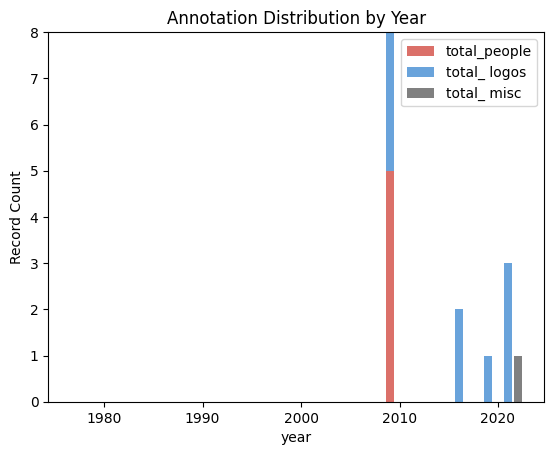

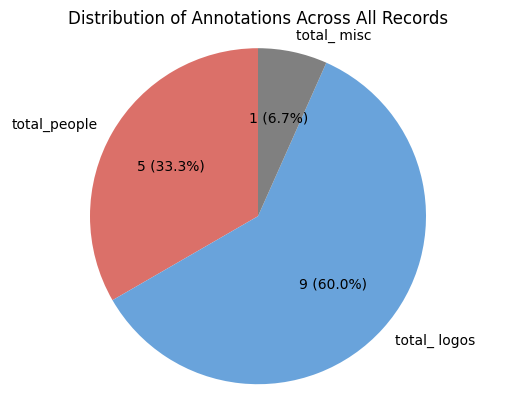

In [9]:
collection = zbf.read_collection("myannotatedcollection.csv")

# make a pie chart of the total number of records analyzed
# sections for each annotation condition
collection.plot_annotations(plot_type="bar", x_axis="year")
collection.plot_annotations(plot_type="pie")

This may be slightly misleading, as not all .pdfs  wer successfully processed, and not all records had available .pdfs.   
You can check this with another built-in plotting method:  

2025-05-23 11:22:05,957 - WARNING - The .pdf file does not exist for [23] Redox potentiometry: Determination of midpoint potentials of oxidation-reduction components of biological electron-transfer systems: /home/ispackman/scratch/zbinfigs/examples/.\Zotero\storage\B5QRBI2N\Leslie Dutton - 1978 - [23] Redox potentiometry Determination of midpoin.pdf
2025-05-23 11:22:05,959 - WARNING - The HTML file does not exist for [23] Redox potentiometry: Determination of midpoint potentials of oxidation-reduction components of biological electron-transfer systems: /home/ispackman/scratch/zbinfigs/examples/C:\Users\isaac\Zotero\storage\CR56IDRB\S0076687978540263.html
2025-05-23 11:22:05,960 - WARNING - No valid file found for [23] Redox potentiometry: Determination of midpoint potentials of oxidation-reduction components of biological electron-transfer systems.
2025-05-23 11:22:05,960 - WARNING - No valid file found for record 8A3JWPSS
2025-05-23 11:22:05,961 - INFO - The .pdf file exists for “How 

(<Figure size 640x480 with 1 Axes>,
 <Axes: title={'center': 'Distribution of File Types Across All Years'}>)

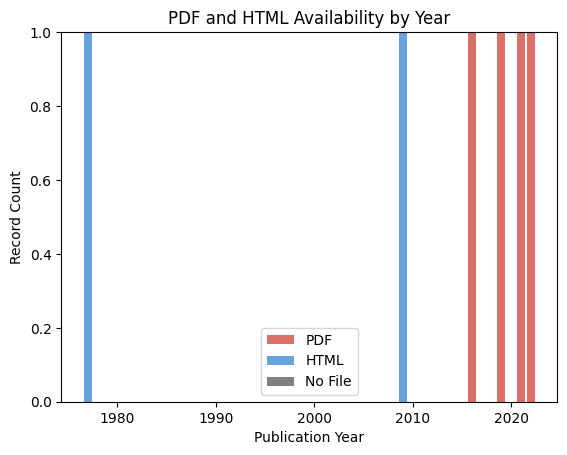

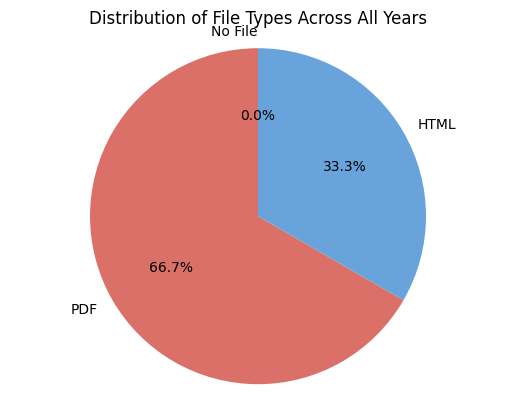

In [10]:
# make a pie chart of the total number of records
# sections for .html files and .pdf files available
collection.plot_pdfs_available(plot_type="bar", x_axis="Publication Year")
collection.plot_pdfs_available(plot_type="pie")

### Train and Test Classifier  
Now that the data is sorted and labeled, it may be useful to train a classifier to recognize a figure's category based on the image itself. This could then be used in more advanced sorting / analysis models to screen new studies for inclusion in a systematic literature review.   
  
This functionality is currently not implemented, but we welcome collaboration to make simplify this process for our users!  
  
## Summary  
The newly developed python package `zbinfigs` serves to streamline the process of systematic literature review by making it easier to skim figures from hundreds of papers by removing the surrounding text. The package allows for sorting and annotation of figures with the intention of eventually supporting training machine leanring classifiers to analyze research articles.  
The code input is a .csv exported from a zotero collection. The code allows for several options:  
  1. Organize and compile .pdfs
  2. Extract images to summary .pdf
  3. Read annotations
  4. Train and test classifier (future implementation)  
  
The authors welcome collaboration around documentation, testing and implementation of integrated machine learning classifiers.  
The authors make no claim to the example zotero collection or the papers contained within, all rights are reserved to the publishers.  
  
---
**Authors:**   
Isaac Spackman, *Colorado School of Mines*  
Shubham Vyas, *Colorado School of Mines*